In [1]:
import os
import pandas as pd
import numpy as np
import cv2 as cv

In [6]:
path = 'D:/Image Classification Self/Data/Myntra Dataset/myntradataset/'

In [12]:
data = pd.read_csv(path + 'styles.csv')
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


In [14]:
classes = {'Boys':0, 'Girls':1, 'Men':2, 'Unisex':3, 'Women':4}

Men


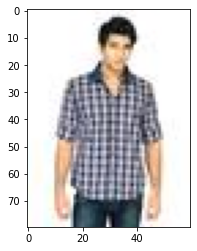

In [18]:
import matplotlib.pyplot as plt

print(data['gender'][0])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(data['id'][0]) + '.jpg'), cv.COLOR_BGR2RGB))

Women


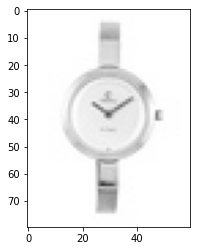

In [19]:
print(data['gender'][2])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(data['id'][2]) + '.jpg'), cv.COLOR_BGR2RGB))

In [24]:
images = []
labels = []

def load_data(dataset):
    for i in range(len(dataset)):
        image = cv.imread(path + 'images/' + str(dataset['id'][i]) + '.jpg')
        if image is None:
            continue
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        image = cv.resize(image, (80, 80))
        image = image.astype('float32')/255.0
        label = classes[dataset['gender'][i]]
        images.append(image)
        labels.append(label)
    images_r = np.array(images)
    labels_r = np.array(labels)
    return images_r, labels_r

In [25]:
images, labels = load_data(data)

In [26]:
images.shape, labels.shape

((44441, 80, 80, 3), (44441,))

In [28]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=123)

In [30]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(39996, 80, 80, 3) (4445, 80, 80, 3) (39996, 5) (4445, 5)


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, validation_split=0.1)

train_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='training')
val_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='validation')

In [33]:
del images
del labels

In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Input, Dense, Dropout
from tensorflow.keras.models import Sequential

In [45]:
model = Sequential()
model.add(Input((80, 80, 3)))

model.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())

model.add(Dense(1024, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 80, 80, 16)        448       
_________________________________________________________________
batch_normalization_50 (Batc (None, 80, 80, 16)        64        
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 80, 80, 16)        2320      
_________________________________________________________________
batch_normalization_51 (Batc (None, 80, 80, 16)        64        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 40, 40, 32)        4640      
_________________________________________________________________
batch_normalization_52 (Batc (None, 40, 40, 32)       

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint(svae_best_only=True, monitor='val_accuracy', mode='max', patience=15, filepath='D:/Image Classification Self/Data/Myntra Dataset/myntradataset/myntra_clothes_gender_classification.h5')

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit_generator(train_batches, validation_data=val_batches, epochs=50, steps_per_epoch=(35996//32), callbacks=[cp])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1124 steps, validate for 125 steps
Epoch 1/50
1124/1124 [==============================] - 388s 345ms/step - loss: 0.7367 - accuracy: 0.7284 - val_loss: 0.5609 - val_accuracy: 0.7867
Epoch 2/50
1124/1124 [==============================] - 375s 334ms/step - loss: 0.5262 - accuracy: 0.8022 - val_loss: 0.5474 - val_accuracy: 0.7789
Epoch 3/50
1124/1124 [==============================] - 375s 334ms/step - loss: 0.4723 - accuracy: 0.8266 - val_loss: 0.6351 - val_accuracy: 0.7709
Epoch 4/50
1124/1124 [==============================] - 375s 333ms/step - loss: 0.4439 - accuracy: 0.8401 - val_loss: 0.4993 - val_accuracy: 0.8190
Epoch 5/50
1124/1124 [==============================] - 375s 334ms/step - loss: 0.4135 - accuracy: 0.8527 - val_loss: 0.5622 - val_accuracy: 0.7799
Epoch 6/50
1124/1124 [==============================] - 375s 334ms/step - loss: 0.3956 - 

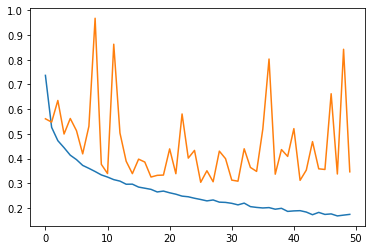

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

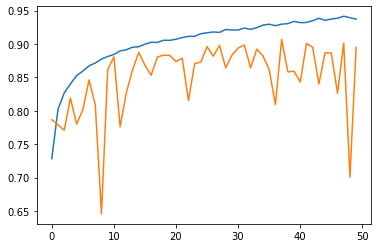

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [53]:
model.evaluate(X_test, Y_test_req)

4445/4445 [==============================] - 13s 3ms/sample - loss: 0.2975 - accuracy: 0.9055


[0.29745725485819935, 0.9055118]

In [54]:
from tensorflow.keras.models import load_model

model_new = load_model('D:/Image Classification Self/Data/Myntra Dataset/myntradataset/myntra_clothes_gender_classification.h5')

In [55]:
predictions = []

for i in range(len(X_test)):
    image = X_test[i].reshape((1, 80, 80, 3))
    pred = model_new.predict(image)
    i = np.argmax(pred)
    predictions.append(i)

In [56]:
predictions

[4,
 2,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 3,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 4,
 2,
 2,
 4,
 2,
 2,
 4,
 0,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 0,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 3,
 4,
 2,
 1,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 3,
 4,
 2,
 3,
 4,
 4,
 4,
 4,
 0,
 2,
 4,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 2,
 4,
 3,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 2,
 4,
 1,
 2,
 4,
 4,
 2,
 4,
 2,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 0,
 4,
 2,
 4,
 2,
 4,
 4,
 4,


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [58]:
accuracy_score(Y_test, predictions)

0.905511811023622

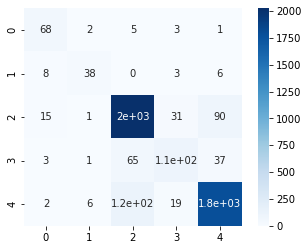

In [59]:
cm = confusion_matrix(Y_test, predictions)
hm = sns.heatmap(cm, annot=True, square=True, cmap='Blues')
plt.show(hm)